In [55]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Öncelikle matplotlib kütüphanes ile resimlerin gösterilmesi 
üzerinde çalışma yapıyorum.

In [56]:
# çalışılan klasörün yolunu veriri
# gets working directory absolute path
print(os.getcwd())

c:\Users\muss\Desktop\My GitHub Repos\Python-Mini-Projects\ImageProcessingExercises\Project01


In [57]:
def divide_chunk(list, n):
    return (list[i:i+n] for i in range(0, len(list), n))

In [58]:
# yolların olduğu klasörün yolu belirtilir
roadImagePath = "roads"
# klasörün içindeki tüm dosyların isimleri
roadImages = os.listdir(roadImagePath)
print("Klasördeki dosya sayisi : ", len(roadImages))
# diziyi 25'er lik gruplara bölmek
roadImages = list(divide_chunk(roadImages, 27))
print("Klasördeki dosyalar : ", list(roadImages))

Klasördeki dosya sayisi :  289
Klasördeki dosyalar :  [['umm_000000.png', 'umm_000001.png', 'umm_000002.png', 'umm_000003.png', 'umm_000004.png', 'umm_000005.png', 'umm_000006.png', 'umm_000007.png', 'umm_000008.png', 'umm_000009.png', 'umm_000010.png', 'umm_000011.png', 'umm_000012.png', 'umm_000013.png', 'umm_000014.png', 'umm_000015.png', 'umm_000016.png', 'umm_000017.png', 'umm_000018.png', 'umm_000019.png', 'umm_000020.png', 'umm_000021.png', 'umm_000022.png', 'umm_000023.png', 'umm_000024.png', 'umm_000025.png', 'umm_000026.png'], ['umm_000027.png', 'umm_000028.png', 'umm_000029.png', 'umm_000030.png', 'umm_000031.png', 'umm_000032.png', 'umm_000033.png', 'umm_000034.png', 'umm_000035.png', 'umm_000036.png', 'umm_000037.png', 'umm_000038.png', 'umm_000039.png', 'umm_000040.png', 'umm_000041.png', 'umm_000042.png', 'umm_000043.png', 'umm_000044.png', 'umm_000045.png', 'umm_000046.png', 'umm_000047.png', 'umm_000048.png', 'umm_000049.png', 'umm_000050.png', 'umm_000051.png', 'umm_0

In [72]:
def plot_images(listOfImage, row=9, col=3, limit=1):
    numberOfFigure = 1
    for count, imgList in enumerate(listOfImage):
        fig = plt.figure(num=count+1, figsize=(12, 12)) # grafiğin genişlik ve yüksekliği belirlenir
        for count, img in enumerate(imgList):
            oImg = cv2.imread(os.path.join(roadImagePath, img))
            oImg = cv2.cvtColor(oImg, cv2.COLOR_BGR2HSV_FULL)
            
            oImg = np.asarray(oImg)
            fig.add_subplot(row, col, (count+1)%(row*col+1))
            plt.imshow(oImg)
        plt.show()
        if(numberOfFigure >= limit):
            break
        numberOfFigure += 1

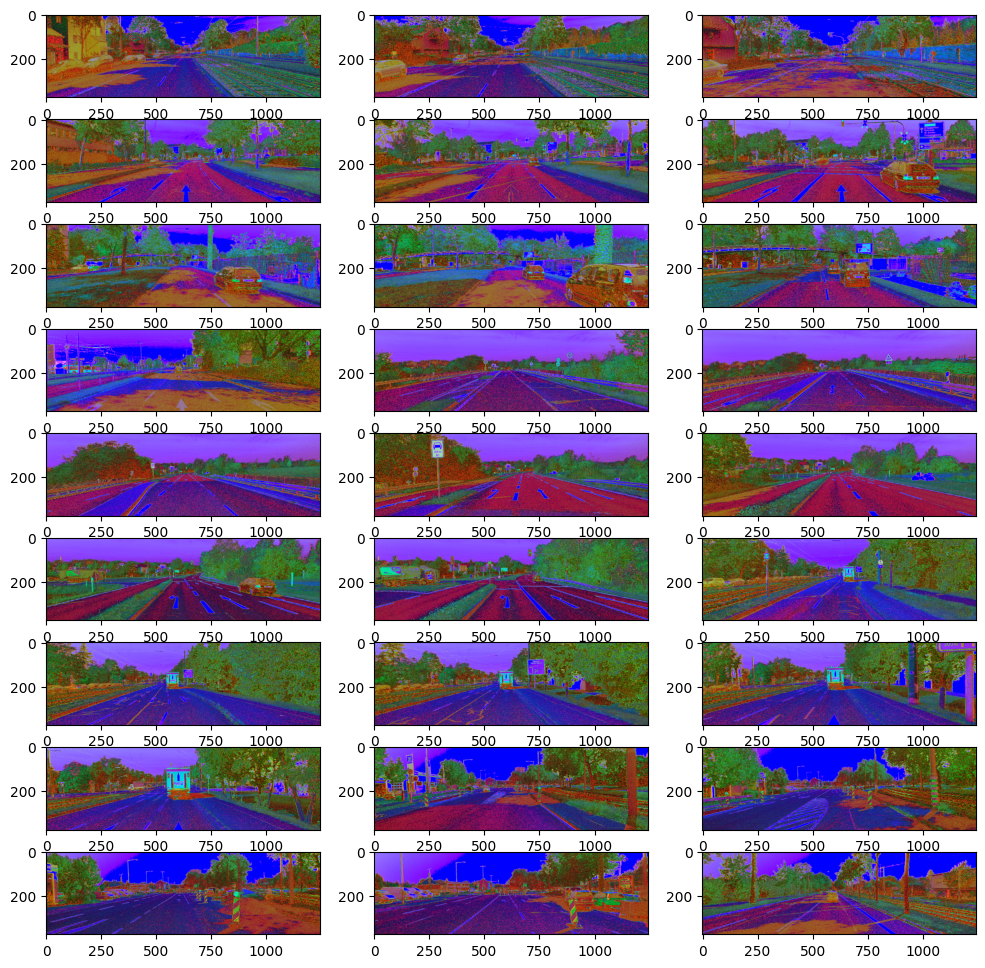

In [73]:
plot_images(roadImages)